<a href="https://colab.research.google.com/github/wquan8/wquan8.github.io/blob/master/car_msrp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 
import numpy as np

cardata = pd.read_csv('https://github.com/TheMadHatter666/MachineLearningSummerCamp/raw/master/New_cars_cleaned.csv')
cardata.columns

Index(['MSRP', 'EPA Fuel Economy Est - City (MPG)', 'Engine', 'Drivetrain',
       'Passenger Capacity', 'Passenger Doors', 'Base Curb Weight (lbs)',
       'Passenger Volume (ft³)', 'Wheelbase (in)', 'Track Width, Front (in)',
       'Height, Overall (in)', 'Fuel Tank Capacity, Approx (gal)',
       'SAE Net Torque @ RPM', 'Fuel System', 'SAE Net Horsepower @ RPM',
       'Displacement', 'Trans Description Cont.', 'Trans Type',
       'Suspension Type - Front', 'Suspension Type - Rear',
       'Air Bag-Frontal-Driver', 'Air Bag-Frontal-Passenger',
       'Air Bag-Passenger Switch (On/Off)', 'Air Bag-Side Body-Front',
       'Air Bag-Side Body-Rear', 'Air Bag-Side Head-Front',
       'Air Bag-Side Head-Rear', 'Brakes-ABS', 'Child Safety Rear Door Locks',
       'Daytime Running Lights', 'Traction Control', 'Night Vision',
       'Rollover Protection Bars', 'Fog Lamps', 'Parking Aid',
       'Tire Pressure Monitor', 'Back-Up Camera', 'Stability Control',
       'Basic Miles/km', 'Basic 

In [ ]:
selectedNumColumns = cardata.select_dtypes(['number']).columns 
selectedColumns = selectedNumColumns.to_list() + ['Engine','Manufacturer']
cardataNo = cardata[selectedColumns]
cardataNo = cardataNo[cardataNo.MSRP.isnull() == False]
cardataNo.shape
cardataNo[selectedNumColumns].mean()
meanSet = cardata.select_dtypes(['float']).mean()
cardataNo = cardataNo.fillna(meanSet[1:]).dropna()


In [ ]:
cardataNo.shape

(30288, 46)

In [ ]:
car_df = pd.get_dummies(cardataNo, columns=['Engine','Manufacturer'])
car_df.shape

(30288, 100)

In [ ]:
car_df.columns

Index(['MSRP', 'EPA Fuel Economy Est - City (MPG)', 'Passenger Capacity',
       'Passenger Doors', 'Base Curb Weight (lbs)', 'Passenger Volume (ft³)',
       'Wheelbase (in)', 'Track Width, Front (in)', 'Height, Overall (in)',
       'Fuel Tank Capacity, Approx (gal)', 'SAE Net Torque @ RPM',
       'SAE Net Horsepower @ RPM', 'Displacement', 'Air Bag-Frontal-Driver',
       'Air Bag-Frontal-Passenger', 'Air Bag-Passenger Switch (On/Off)',
       'Air Bag-Side Body-Front', 'Air Bag-Side Body-Rear',
       'Air Bag-Side Head-Front', 'Air Bag-Side Head-Rear', 'Brakes-ABS',
       'Child Safety Rear Door Locks', 'Daytime Running Lights',
       'Traction Control', 'Night Vision', 'Rollover Protection Bars',
       'Fog Lamps', 'Parking Aid', 'Tire Pressure Monitor', 'Back-Up Camera',
       'Stability Control', 'Basic Miles/km', 'Basic Years',
       'Corrosion Miles/km', 'Corrosion Years', 'Drivetrain Miles/km',
       'Drivetrain Years', 'Turning Diameter - Curb to Curb (ft)',
       '

In [ ]:
cardataNumClean = car_df.copy()
cardataNumClean.shape

(30288, 100)

In [ ]:
X = cardataNumClean.iloc[:,1:].to_numpy()
Y = cardataNumClean.iloc[:,0].to_numpy()
Y = np.log(Y)

X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size = 0.2)

XtX = X_train.T@X_train
u,V = np.linalg.eig(XtX)
print("rank is ", np.linalg.matrix_rank(XtX))
print("condition number is ",np.linalg.cond(XtX))
print("log10 of condition number is", np.log10(np.linalg.cond(XtX)))
print("eigen values is :", u)
print("Choose eigen values : ", u.cumsum()/u.sum())

print("====================================")
numOfChosenEigen = 90
D = np.diag(u[:numOfChosenEigen])
VNew = V[:,:numOfChosenEigen]
W = X_train@VNew
betahat = np.linalg.inv(D)@W.transpose()@y_train

ypredicted = X_test @ VNew @betahat 

error = y_test - ypredicted

avgerror = error.mean()

print("Average y is {:.6f}".format(y_test.mean()))

print("Average error is {:.6f}".format(avgerror))

R2 = 1- error.var()/y_test.var()

print("explained variance our of sample is {:.4f}".format(R2))

rank is  91
condition number is  8.416651029215054e+28
log10 of condition number is 28.92513932085202
eigen values is : [ 7.58861321e+14  3.43842521e+13  1.41419930e+13  3.88076146e+12
  1.50987540e+10  1.06911150e+09  3.06571341e+08  1.94779131e+07
  6.49672015e+06  3.67356648e+06  1.29269460e+06  7.39329307e+05
  3.46476708e+05  1.67209069e+05  1.38549353e+05  1.22000310e+05
  6.81053953e+04  4.55319586e+04  3.77804090e+04  4.02691153e+04
  1.70953795e+04  1.43956058e+04  1.07714972e+04  7.63599868e+03
  5.55785076e+03  5.14519726e+03  4.92129761e+03  3.91182719e+03
  3.25081208e+03  2.73448402e+03  2.24377879e+03  2.17095694e+03
  2.03138463e+03  1.88428551e+03  1.85306533e+03  1.75887034e+03
  1.60631266e+03  1.51613447e+03  1.35961370e+03  1.26569502e+03
  1.08857180e+03  1.04909109e+03  9.36273382e+02  8.88877817e+02
  7.87353278e+02  7.73884831e+02  7.46912907e+02  6.97297971e+02
  6.04555232e+02  5.65912118e+02  5.10999958e+02  4.54894340e+02
  4.26854102e+02  4.15822517e+02  3

AttributeError: ignored

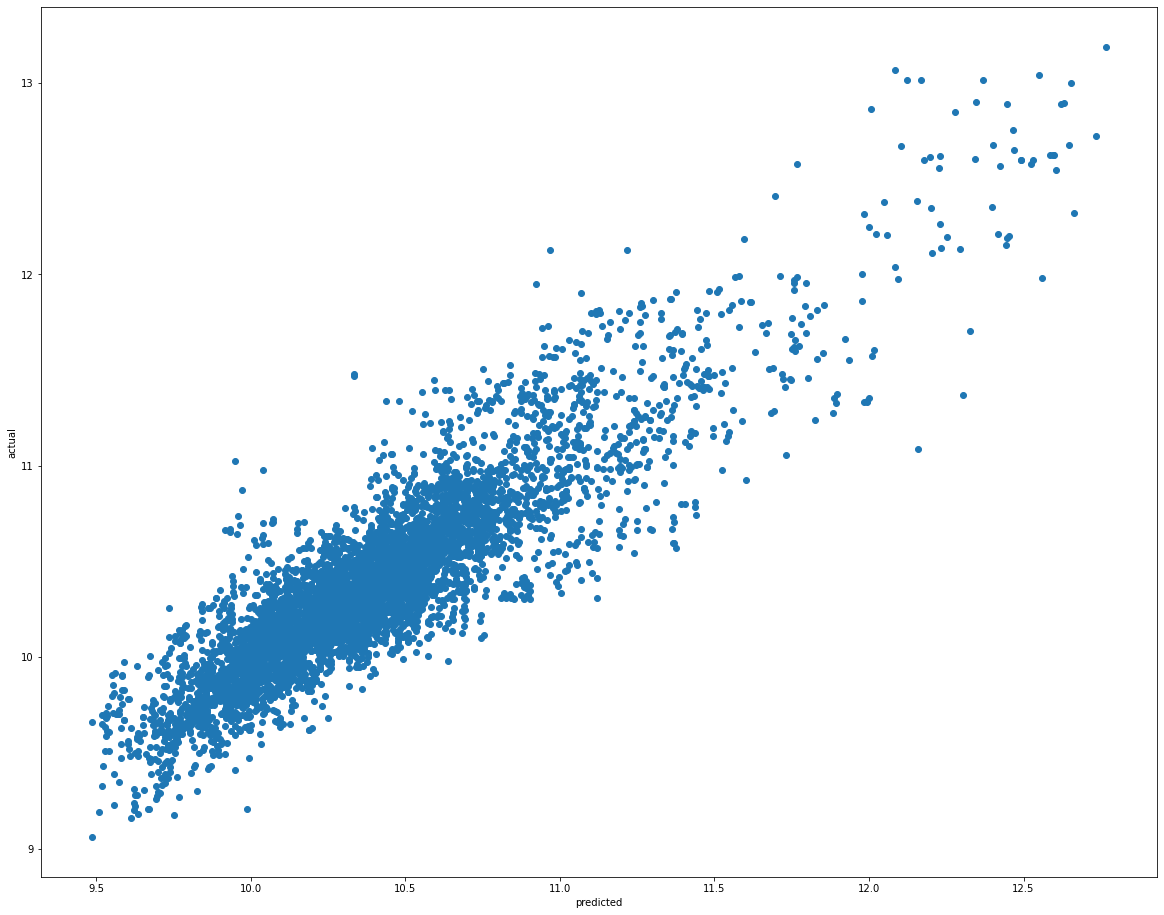

In [ ]:
plt.figure(figsize= (20,16))

plt.scatter(ypredicted, y_test)

plt.xlabel("predicted")
plt.ylabel("actual")

d = np.polyfit(ypredicted,y_test,1)
f = np.poly1d(d)

plt.insert(6,'trend',f(y_test))

#t = np.linspace(-1000,120000)
#plt.plot(t, 12590 + 0.622*t, 'r-')

plt.show()

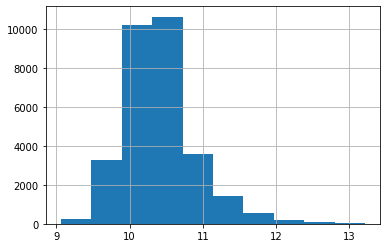

In [ ]:
np.log(car_df.MSRP).hist()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = cardataNumClean.iloc[:,1:].to_numpy()
Y = cardataNumClean.iloc[:,0].to_numpy()
XtX = X.T@X
u,V = np.linalg.eig(XtX)
print("rank is ", np.linalg.matrix_rank(XtX))
print("condition number is ",np.linalg.cond(XtX))
print("log10 of condition number is", np.log10(np.linalg.cond(XtX)))
print("eigen values is :", u)
print("Choose eigen values : ", u.cumsum()/u.sum())

print("====================================")
numOfChosenEigen = 10
D = np.diag(u[:numOfChosenEigen])
VNew = V[:,:numOfChosenEigen]
W = X@VNew
betahat = np.linalg.inv(D)@W.transpose()@Y

ypredicted = X @ VNew @betahat 

error = Y - ypredicted

avgerror = error.mean()

print("Average y is {:.6f}".format(Y.mean()))

print("Average error is {:.6f}".format(avgerror))

R2 = 1- error.var()/Y.var()

print("explained variance our of sample is {:.4f}".format(R2))

rank is  44
condition number is  26144355146186.723
log10 of condition number is 13.41737793436967
eigen values is : [1.05697283e+15 4.30749548e+13 2.76157621e+13 1.57184067e+13
 2.54699443e+12 1.84573089e+10 1.25306837e+09 3.46836956e+08
 2.35853704e+07 7.96387693e+06 4.54389115e+06 1.60581418e+06
 9.27350783e+05 4.38779684e+05 2.06568732e+05 1.71680938e+05
 1.51736442e+05 1.20043632e+05 8.38722981e+04 5.36873732e+04
 4.35598222e+04 2.17727225e+04 1.86240341e+04 1.46353148e+04
 8.72178298e+03 6.48668290e+03 6.03303287e+03 4.36514825e+03
 4.14125392e+03 3.80627740e+03 3.04422868e+03 2.59176039e+03
 2.49231160e+03 4.04283380e+01 3.17770514e+02 2.50731863e+02
 4.85319288e+02 2.19691653e+03 8.16788287e+02 9.98917848e+02
 1.03161654e+03 1.81590217e+03 1.48389033e+03 1.50536245e+03]
Choose eigen values :  [0.92235587 0.95994476 0.98404336 0.99775986 0.99998246 0.99999857
 0.99999966 0.99999997 0.99999999 0.99999999 1.         1.
 1.         1.         1.         1.         1.         1.
 1.

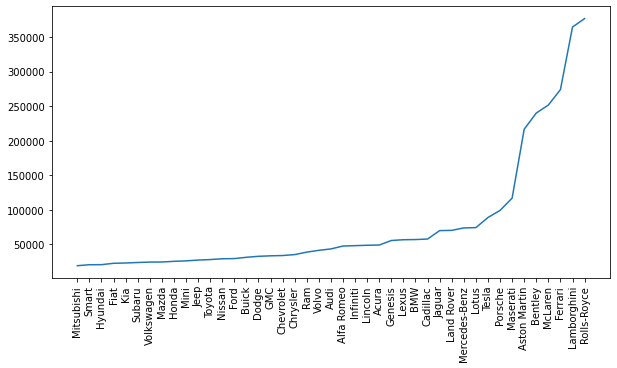

In [ ]:
dfgrp = cardata[['Manufacturer', 'MSRP']].groupby('Manufacturer').mean()
dfPlot = dfgrp.sort_values(by=['MSRP'])
plt.figure(figsize=(10,5))
plt.plot(dfPlot.index, dfPlot.MSRP)
plt.xticks(dfPlot.index, labels=dfPlot.index, rotation='vertical')
plt.show()

In [ ]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization
import plotly.express as px # Interactive Data Visualization
from jupyterthemes import jtplot # Jupyter Notebook Theme
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.
 